In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_csv('Customer_Data.csv')
report_df = pd.DataFrame()

In [3]:
data.shape

(1600, 6)

In [4]:
data.head()

,Unnamed: 0,Gender,Age,Annual Income,Total Spending,Interests
0,0,0,22.0,16.0,512.50,Cooking
1,1,0,34.0,12.0,358.75,Exercise
2,2,0,64.0,13.0,153.75,Travel
3,3,0,70.0,13.0,717.50,Crafts
4,4,1,58.0,22.0,820.00,Travel


In [5]:
data=data.iloc[:,1:6]
data.head()

,Gender,Age,Annual Income,Total Spending,Interests
0,0,22.0,16.0,512.50,Cooking
1,0,34.0,12.0,358.75,Exercise
2,0,64.0,13.0,153.75,Travel
3,0,70.0,13.0,717.50,Crafts
4,1,58.0,22.0,820.00,Travel


In [6]:
#replace ages with correct ones 
data.Age = data.Age.replace({250.0: 25.0, 350.0: 35.0})

# Get names of indexes for which column Income has value
i = data[data['Annual Income'] < 0 ].index
# Delete these row indexes from dataFrame
data.drop(i, inplace=True)
# Get names of indexes for which column Income has value
j = data[data['Annual Income'] == 200000].index
# Delete these row indexes from dataFrame
data.drop(j, inplace=True)

In [7]:
#delete rows with NA
data=data.dropna(axis=0,how='any')

report_df = data

To view the results in two-dimensional feature space, we will retain only two of these four columns. remain the Annual Income and Total Spending.

In [8]:
data = data.iloc[:, 2:4].values

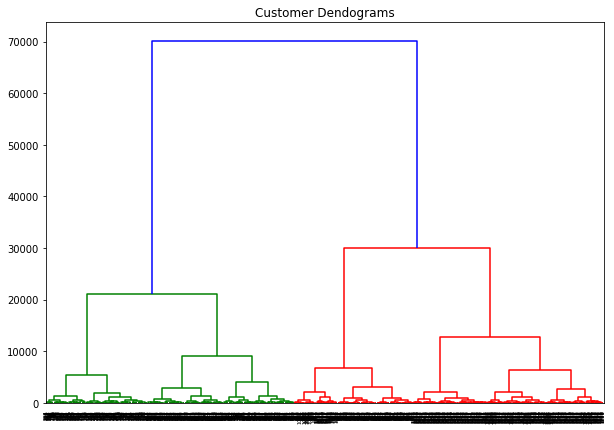

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 4 clusters

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
pred = cluster.fit_predict(data)
print(pred)

[3 3 3 ... 0 2 0]


Since we had 4 clusters, we have 4 labels in the output i.e. 0 to 3.

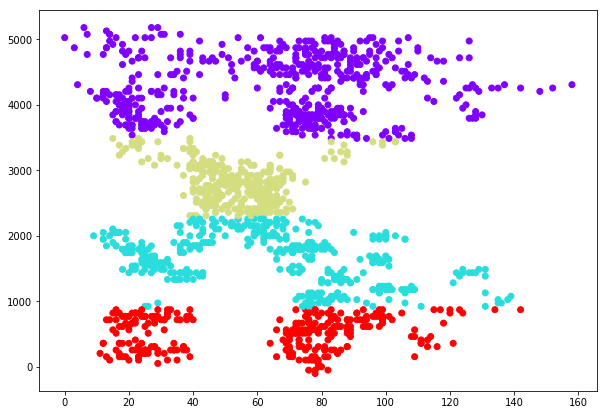

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

You can see the data points in the form of 4 clusters. The data points in the bottom (red) belong to the customers with low spending and different salaries. The data points in the top (purple) belong to the customers with high spending and different salaries. 
This shows that the salaries has no impact on the result, and the spending has big impact on it. So the  Companies  should focus on the spending.

In [12]:
data = pd.DataFrame(data)

In [13]:
report_df["Clusters"] = pred

In [15]:
cl1 = report_df[report_df["Clusters"] == 0]
cl2 = report_df[report_df["Clusters"] == 1]
cl3 = report_df[report_df["Clusters"] == 2]
cl4 = report_df[report_df["Clusters"] == 3]

In [16]:
print("Cluster 1 summary:")
print(cl1.describe().loc['mean'])
print()
print("Most popular interest is: ")
print(cl1['Interests'].value_counts().idxmax())
print("Majority gender is: ")
print(cl1['Gender'].value_counts().idxmax())

Cluster 1 summary:
Gender               0.523105
Age                 30.123845
Annual Income       66.109057
Total Spending    4258.770795
Clusters             0.000000
Name: mean, dtype: float64

Most popular interest is: 
Entertainment
Majority gender is: 
1


In [17]:
print("Cluster 2 summary:")
print(cl2.describe().loc['mean'])
print()
print("Most popular interest is: ")
print(cl2['Interests'].value_counts().idxmax())
print("Majority gender is: ")
print(cl2['Gender'].value_counts().idxmax())

Cluster 2 summary:
Gender               0.508393
Age                 41.275779
Annual Income       63.793765
Total Spending    1653.150480
Clusters             1.000000
Name: mean, dtype: float64

Most popular interest is: 
Photography
Majority gender is: 
1


In [18]:
print("Cluster 3 summary:")
print(cl3.describe().loc['mean'])
print()
print("Most popular interest is: ")
print(cl3['Interests'].value_counts().idxmax())
print("Majority gender is: ")
print(cl3['Gender'].value_counts().idxmax())

Cluster 3 summary:
Gender               0.495627
Age                 40.177843
Annual Income       53.192420
Total Spending    2790.510204
Clusters             2.000000
Name: mean, dtype: float64

Most popular interest is: 
Yoga
Majority gender is: 
0


In [19]:

print("Cluster 4 summary:")
print(cl4.describe().loc['mean'])
print()
print("Most popular interest is: ")
print(cl4['Interests'].value_counts().idxmax())
print("Majority gender is: ")
print(cl4['Gender'].value_counts().idxmax())

Cluster 4 summary:
Gender              0.491409
Age                42.893471
Annual Income      61.900344
Total Spending    515.317869
Clusters            3.000000
Name: mean, dtype: float64

Most popular interest is: 
Crafts
Majority gender is: 
0


Based on the cluster result, we can see the cluster 1  spend the most is younger, so the company should focus on the younger people to  improve sales performence.